In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

% matplotlib inline

# Load data

In [7]:
data = pd.read_csv("data/full_misdemeanor.csv").drop("Unnamed: 0", axis=1)
features, targets = data.drop("CMPLNT_NUM", axis=1), data[["CMPLNT_NUM"]]

# KMeans

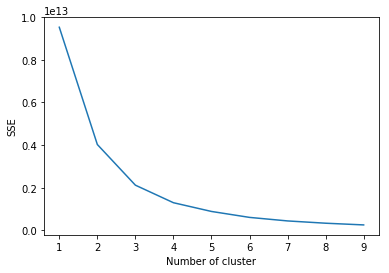

In [11]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(features)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Elbow at k=4

In [21]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters).fit(features)

print("{} crimes on average overall".format(targets.mean()))
cluster_features = pd.DataFrame()

for c in range(n_clusters):
    print("{} crimes on average for cluster {}".format(targets.ix[kmeans.labels_ == c].mean(), c))
    cluster_features["mean_cluster_{}".format(c)] = features.ix[kmeans.labels_ == c].mean(axis=0)
    cluster_features["std_cluster_{}".format(c)] = features.ix[kmeans.labels_ == c].std(axis=0)
    cluster_features["CI_inf_cluster_{}".format(c)] = cluster_features["mean_cluster_{}".format(c)] - cluster_features["std_cluster_{}".format(c)]
    cluster_features["CI_sup_cluster_{}".format(c)] = cluster_features["mean_cluster_{}".format(c)] + cluster_features["std_cluster_{}".format(c)]

CMPLNT_NUM    40.678554
dtype: float64 crimes on average overall
CMPLNT_NUM    34.646098
dtype: float64 crimes on average for cluster 0
CMPLNT_NUM    43.003356
dtype: float64 crimes on average for cluster 1
CMPLNT_NUM    58.059214
dtype: float64 crimes on average for cluster 2
CMPLNT_NUM    29.784659
dtype: float64 crimes on average for cluster 3


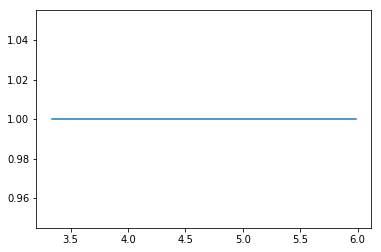

In [24]:
for c in range(n_clusters):
    for i, col in enumerate()
plt.plot([cluster_features["CI_inf_cluster_{}".format(c)]["Median number of rooms"], cluster_features["CI_sup_cluster_{}".format(c)]["Median number of rooms"]], [1, 1])

Median number of rooms                                                                                                                                                4.297278
Total                                                                                                                                                               833.144465
Total - Imputed                                                                                                                                                      16.303085
Total - Not imputed                                                                                                                                                 816.841379
Family households:                                                                                                                                                  308.423593
Family households: - Married-couple family                                                                                   